# ***Detecting Vela Pulsar in Ooty Radio Telescope : Voltage data Analysis***

ARSHI ALI

PRN: 22021005


In [5]:
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st
from scipy.stats import norm
import seaborn as sns
from scipy.fft import fft, fftfreq


In [6]:
file = 'vela.csv'
data=pd.read_csv(file)
list(data.columns)
len(data)

1048575

In [7]:
north_vol=data['N']
south_vol=data['S']

# TASK 1 VOLTAGE-TIME SERIES

The goal was to plot and visualize the voltage time series from two antennas, North and South apertures, as described in the provided task prompt. The following steps were taken to achieve this:

1. Two subplots were created using Matplotlib to display the voltage time series for both antennas.

2. The voltage data for the North aperture (`north_vol`) and the South aperture (`south_vol`) were plotted on separate subplots.

3. Each subplot was appropriately labeled with axis labels for time (X-axis) and voltage (Y-axis).

4. The time range for visualization was set to display the first 250 data points, providing a clear view of the voltage variability.


Voltage Time Series: The voltage time series represents the electrical signals received by radio antennas over a period of time. In the context of radio astronomy, these signals are often generated by celestial objects, such as pulsars, quasars, and galaxies. Analyzing the voltage time series is a fundamental step in studying these astronomical sources.

Visualization of Variability: Plotting the voltage time series allows astronomers to visually inspect the variability of the received signals. Variations in voltage amplitude over time may indicate the presence of interesting astronomical phenomena or interference from other sources. These variations can provide valuable insights into the behavior of celestial objects.

Interpretation: This task provides a visual representation of the raw data received by radio antennas. It forms the foundation for more advanced analyses and helps researchers identify patterns, anomalies, and potential scientific discoveries in the voltage time series data.

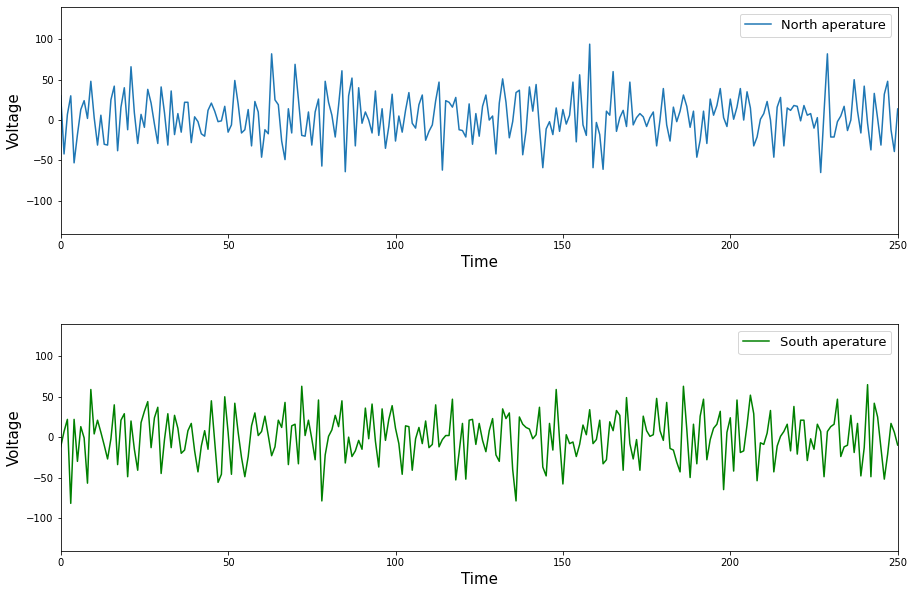

In [8]:

fig, ax = plt.subplots(nrows=2,ncols=1, figsize=(15,10))

ax[0].plot(north_vol,label="North aperature")
ax[0].set_xlim(0,250)
ax[0].set_xlabel("Time",fontsize=15)
ax[0].set_ylabel("Voltage",fontsize=15)


ax[1].plot(south_vol,label="South aperature",color='green')
ax[1].set_xlim(0,250)
ax[1].set_xlabel("Time",fontsize=15)
ax[1].set_ylabel("Voltage",fontsize=15)

ax[0].legend(fontsize=13)
ax[1].legend(fontsize=13)


plt.subplots_adjust(wspace=0.4,hspace=0.4)

# TASK 2  Probability distribution


In this task, the objective was to plot the voltage amplitude distribution for two antennas, North and South apertures, and calculate the mean and standard deviation of the probability density function (PDF). The following steps were taken to achieve this:

1. Two subplots were created to display the PDF and histogram for both the North and South apertures.

2. For the North Aperture Data:
   - The mean and standard deviation of the voltage data were calculated using standard formulas.
   - The Gaussian PDF values were computed based on the calculated mean and standard deviation. $ f(x) = \frac{1}{σ\sqrt{2π}}e^\frac{-(x-μ)^2}{2σ^2}$
   - The histogram of the North aperture data was plotted, and the PDF curve was overlaid on it.

3. Similar steps were followed for the South Aperture Data



The resulting plots provide visual representations of the voltage amplitude distributions for both antennas, including Gaussian PDF curves that approximate the data. The mean and standard deviation values were also calculated and marked on the plots, as specified in the task prompt.

Interpretation: By analyzing the PDF and calculating the mean and standard deviation, we gain insights into the statistical properties of the received signals. For example, a Gaussian-shaped PDF suggests that the received voltages follow a normal distribution, which is a common assumption in signal processing. Deviations from this shape may indicate the presence of interference or non-Gaussian behavior in the signal.



Mean for North aperature 3.4748978375414254
Standard deviation for North aperature 27.981518640458848

Mean for South aperature 0.7309968290298738
Standard deviation for South aperature 29.856092234210177


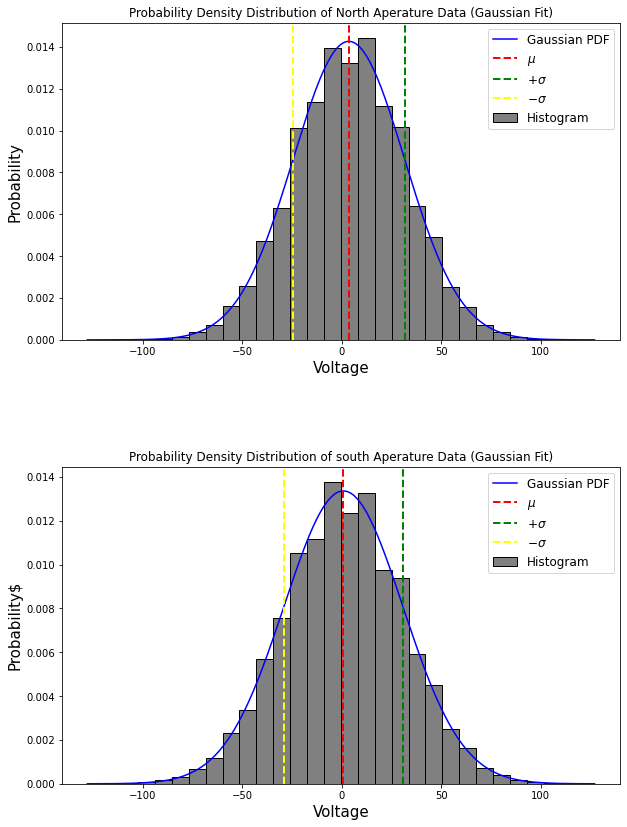

In [9]:
fig, ax = plt.subplots(nrows=2,ncols=1, figsize=(10,14))


################# For North Aperature Data #################

# mean and standard deviation
mean = np.sum(north_vol)/len(north_vol)
x2avg = np.sum(north_vol**2)/len(north_vol)
std_dev = np.sqrt(x2avg - mean**2)


x_range = np.linspace(min(north_vol), max(north_vol), 1000) 
# Gaussian probability density values
pdf_values = norm.pdf(x_range, loc=mean, scale=std_dev)




ax[0].plot(x_range, pdf_values, label='Gaussian PDF', color='blue')
ax[0].hist(north_vol, density=True, bins=30, label='Histogram', color='gray', ec='black')


ax[0].axvline(mean, color='red', linestyle='dashed', linewidth=2, label=r'$\mu$')
ax[0].axvline(mean + std_dev, color='green', linestyle='dashed', linewidth=2, label=r'$+\sigma$')
ax[0].axvline(mean - std_dev, color='yellow', linestyle='dashed', linewidth=2, label=r'$-\sigma$')
print("Mean for North aperature",mean)
print("Standard deviation for North aperature",std_dev)

ax[0].set_title('Probability Density Distribution of North Aperature Data (Gaussian Fit)')
ax[0].set_xlabel('Voltage',fontsize=15)
ax[0].set_ylabel(r'Probability',fontsize=15)
ax[0].legend(fontsize=12)



################ for South Aperature Data ################


# mean and standard deviation
mean = np.sum(south_vol)/len(south_vol)
x2avg = np.sum(south_vol**2)/len(south_vol)
std_dev = np.sqrt(x2avg - mean**2)


x_range = np.linspace(min(south_vol), max(south_vol), 1000) 
# Gaussian probability density values
pdf_values = norm.pdf(x_range, loc=mean, scale=std_dev)




ax[1].plot(x_range, pdf_values, label='Gaussian PDF', color='blue')
ax[1].hist(south_vol, density=True, bins=30, label='Histogram', color='gray', ec='black')


ax[1].axvline(mean, color='red', linestyle='dashed', linewidth=2, label=r'$\mu$')
ax[1].axvline(mean + std_dev, color='green', linestyle='dashed', linewidth=2, label=r'$+\sigma$')
ax[1].axvline(mean - std_dev, color='yellow', linestyle='dashed', linewidth=2, label=r'$-\sigma$')
print("")
print("Mean for South aperature",mean)
print("Standard deviation for South aperature",std_dev)

ax[1].set_title('Probability Density Distribution of south Aperature Data (Gaussian Fit)')
ax[1].set_xlabel('Voltage',fontsize=15)
ax[1].set_ylabel(r'Probability$',fontsize=15)
ax[1].legend(fontsize=12)

plt.subplots_adjust(wspace=0.4,hspace=0.4)


# TASK 3 POWER TIME SERIES & its distribution

In this task, the goal was to obtain the uncalibrated power from the voltages received by the North and South antennas, plot the power time series, and analyze the power distribution while estimating the parameters characterizing the probability density function (PDF). Here's a summary of what was done:

1. **Power Calculation**: The electrical power was calculated by squaring the voltage values from both the North and South antennas. This step involves element-wise squaring of the voltage time series, resulting in power time series data.

2. **Power Time Series Plot**: Two subplots were created to visualize the power time series for both antennas. The X-axis represents time, while the Y-axis represents power. The power time series provides insights into the variations in received power over time.

3. **Time Reference**: A time coordinate was assigned to the X-axis, establishing a reference point for the observations. This allows astronomers to track changes in power over time and correlate them with celestial events or phenomena.

4. **Histogram and PDF**: The distribution of power was obtained by plotting a histogram of the power data. The mean and standard deviation of the power samples for both antennas were calculated using standard formulas.


5. **PDF Curve**: A probability density function (PDF) curve was overlaid on the histogram to visualize the distribution's shape.We have to plot Probability distribution of Power and compare it with Exponential Fitting which is given by :  
 $f(x)=λe^{-λx}$

Here, $λ=\frac{1}{σ}$

6. **Visualization and Legends**: Proper labeling, legends, and adjustments were made to the subplots to enhance clarity in the presentation of the power time series and distribution.

Interpretation: Overall, this task involved the transformation of voltage data into power data, analysis of power variations over time, and characterization of the power distribution. It allows astronomers to assess the strength and variability of signals received by the antennas, which is essential for interpreting radio astronomy observations.

Mean for North aperature 1590.07957664409
Standard deviation for North aperature 2249.801593715829

Mean for South aperature 1590.07957664409
Standard deviation for South aperature 2249.801593715829


(-100.0, 7000.0)

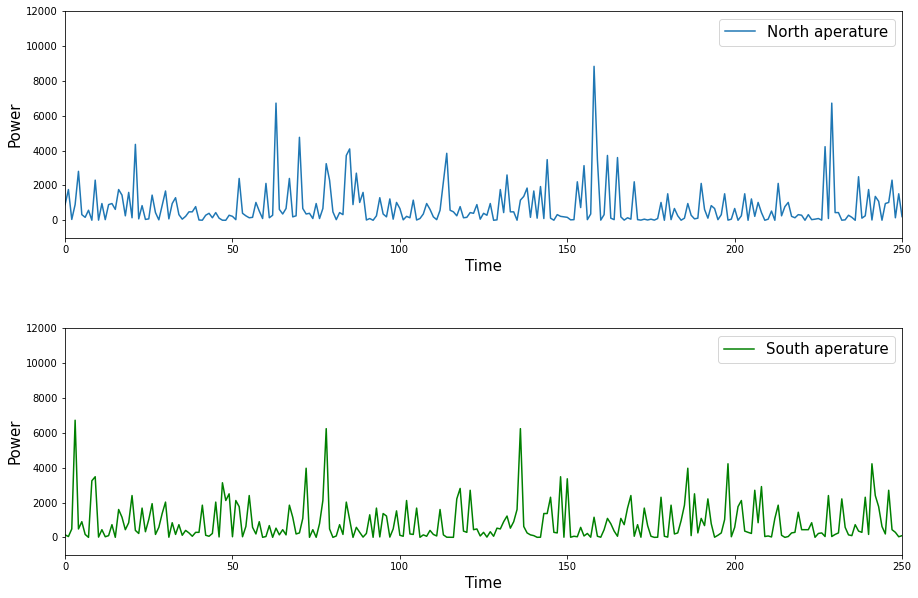

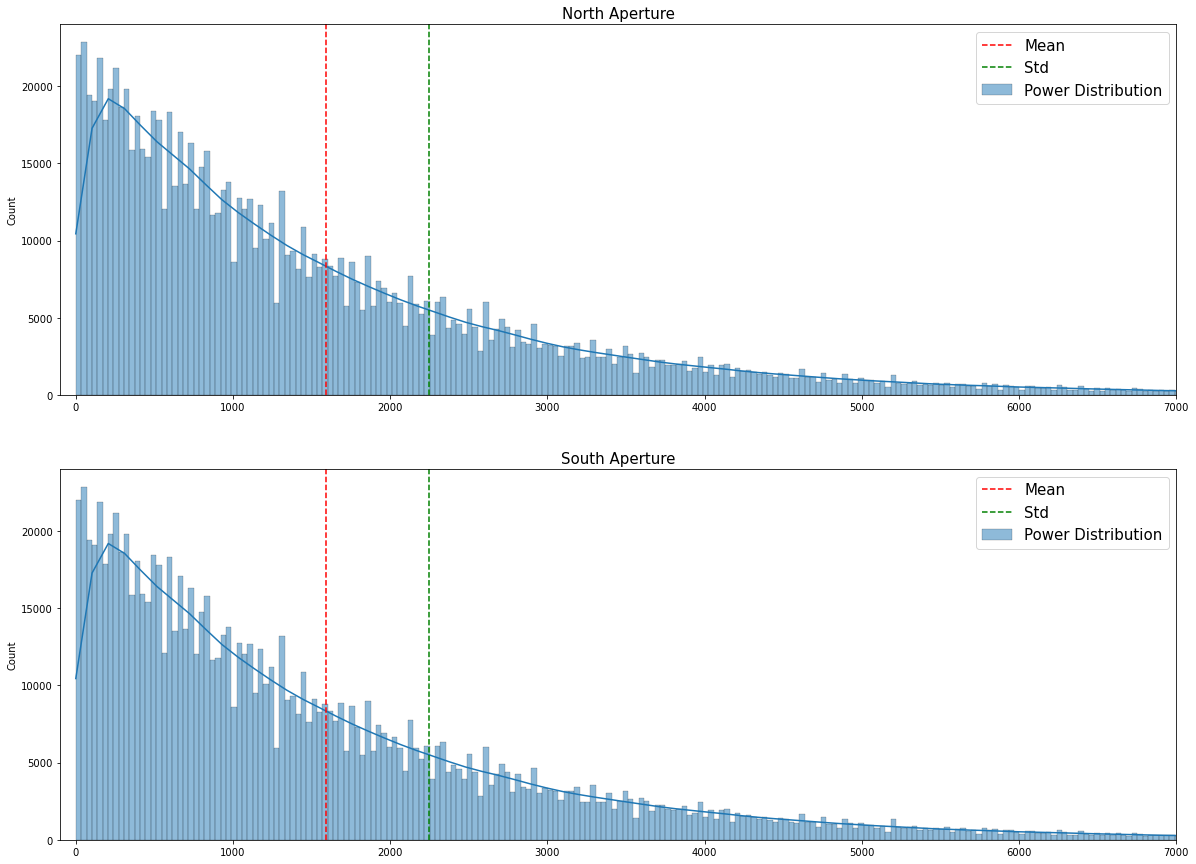

In [8]:

fig, ax = plt.subplots(nrows=2,ncols=1, figsize=(15,10))


north_power = north_vol ** 2
time1 = range(len(north_power))
ax[0].plot(time1,north_power,label="North aperature")
ax[0].set_xlim(0,250)
ax[0].set_xlabel("Time",fontsize=15)
ax[0].set_ylabel("Power",fontsize=15)


south_power = south_vol ** 2
time2 = range(len(south_power))
ax[1].plot(time2,south_power,label="South aperature",color='green')
ax[1].set_xlim(0,250)
ax[1].set_xlabel("Time",fontsize=15)
ax[1].set_ylabel("Power",fontsize=15)

ax[0].legend(fontsize=15)
ax[1].legend(fontsize=15)

ax[0].set_ylim(-1000,12000)
ax[1].set_ylim(-1000,12000)
plt.subplots_adjust(wspace=0.4,hspace=0.4)



# POWER DISTRIBUTION#####################################################################


r = len(north_power)
pNorth=list(); pSouth=list()

for i in range(r-1):
    pNorth.append(north_power[i]+north_power[i+1])
    pSouth.append(north_power[i]+north_power[i+1])

pNorth=np.array(pNorth)
pSouth=np.array(pSouth)

meanNorthP=np.sum(pNorth)/len(pNorth)
stdNorthP=np.sqrt(np.sum(pNorth**2)/len(pNorth)-(meanNorthP/len(pNorth))**2)
print("Mean for North aperature",meanNorthP)
print("Standard deviation for North aperature",stdNorthP)

meanSouthP=np.sum(pNorth)/len(pNorth)
stdSouthP=np.sqrt(np.sum(pSouth**2)/len(pSouth)-(meanSouthP/len(pSouth))**2)
print("")
print("Mean for South aperature",meanSouthP)
print("Standard deviation for South aperature",stdSouthP)

fig4=plt.figure(figsize=(20,15))

plt.subplot(211)
sns.histplot(pNorth[0:r], kde=True, label="Power Distribution")
plt.title("North Aperture",fontsize=15)
plt.axvline(meanNorthP, color="red", ls="--", label="Mean")
plt.axvline(stdNorthP, color="green", ls="--", label="Std")
plt.legend(fontsize=15)
plt.xlim(-100,7000)

plt.subplot(212)
sns.histplot(pSouth[0:r], kde=True, label="Power Distribution")
plt.title("South Aperture",fontsize=15)
plt.axvline(meanSouthP, color="red", ls="--", label="Mean")
plt.axvline(stdSouthP, color="green", ls="--", label="Std")
plt.legend(fontsize=15)
plt.xlim(-100,7000)


#  TASK 4  POWER v/s FREQUENCY

The Power Spectrum of a signal describes the power present in the signal as a function of frequency. Any
physical signal can be decomposed into a spectrum of frequencies over a range. We used a very efficient
algorithm known as the Fast Fourier Transform (FFT) to plot the power distribution as a function of frequency.
we performed a Fast Fourier Transform (FFT) analysis on the voltage data received by the North and South apertures. The FFT allowed we to transform the time-domain voltage signals into the frequency domain, revealing the spectral content of the signals. 

1. **Choice of Number of Bins (Nf)**:
   - we divided the total signal bandwidth of 16.5 MHz into 256 frequency bins (Nf = 256).

2. **Frequency Resolution**:
   - we achieved a frequency resolution of 16.5 MHz / 256 bins ≈ 64.45 kHz per bin.
   - This resolution indicates that we can discern frequency components with a granularity of approximately 64.45 kHz in the power spectra.

3. **Spectral Time Bins**:
   - Each spectrum represents a time span of 4.25 milliseconds (Tfft = 4.25 ms).
   - This is the duration of data that contributes to each power spectrum.
   - It's important to have spectral time bins smaller than the variability time scale of interest, such as the expected period of a pulsar.

4. **Power Spectra Calculation**:
   - The modulus-square operation on the Fourier transform outputs provided the power spectra.
   - This operation squared the amplitude of each frequency component, giving we the distribution of power across frequencies.
   - The power spectra reveal which frequencies carry significant energy in the received signals.

5. **Averaging**:
   - To improve signal quality and reduce noise, we averaged the power spectra.
   - Averaging over multiple spectra helps in identifying common spectral patterns and reducing random fluctuations.


Interpretation:
- The power spectra provide insights into the spectral characteristics of the received signals. Peaks in the power spectra indicate frequencies where there is a significant concentration of energy.
- The shape and width of these peaks can reveal information about the underlying astronomical sources. For example, a narrow, well-defined peak might correspond to a pulsar with a specific frequency, while broader features could indicate more complex sources. Note that the The sharp peaks in the spectra might also indicate the presence of local Radio Frequency Interference (RFI). RFI is a disturbance caused by an external source like cellular networks, lightning, solar flares, etc that affects the electrical circuit used to originally measure the voltage signals from the pulsar.
- The plots allow astronomers to identify important frequency components and make inferences about the nature of celestial objects emitting these signals.

In summary, Task 4 enabled we to analyze the spectral content of the voltage signals received by the North and South apertures, providing valuable information about the distribution of power across different frequencies in the radio frequency range of interest. 

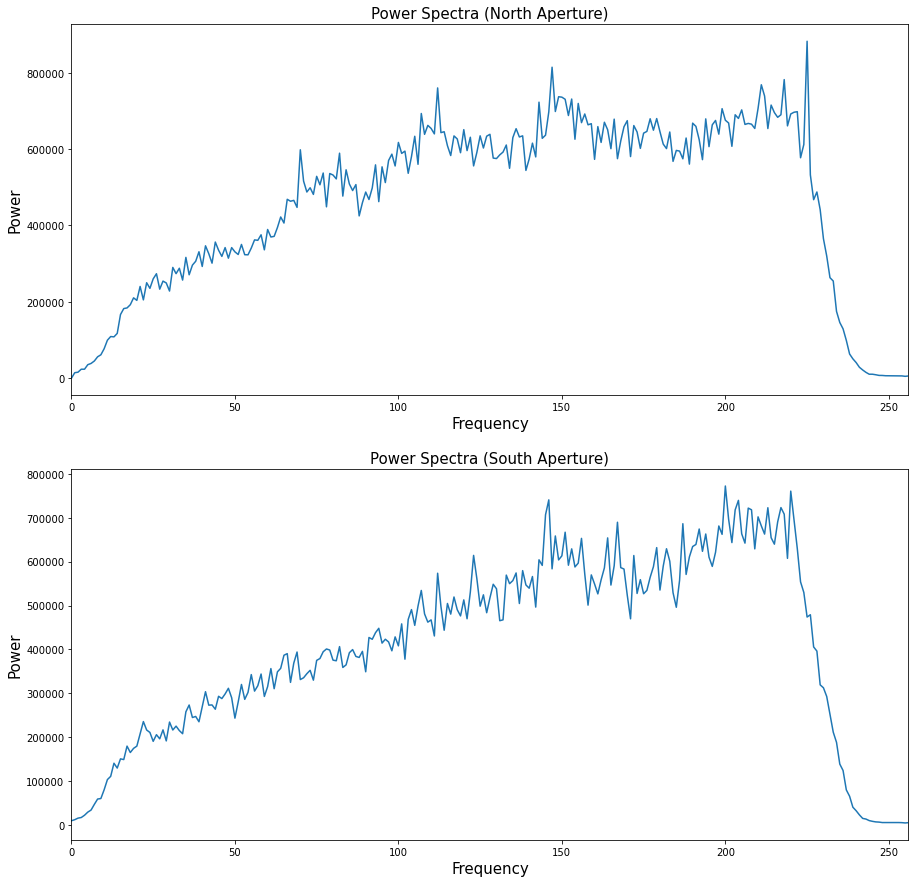

In [15]:

Nf=256         #Number of Bins
N=2*Nf         #Number of data Samples
bandwidth=16.5*1e6          #Hz
freqRes=bandwidth/Nf        #Hz
sampleRate=2*bandwidth      #Hz
dt=1/sampleRate             #seconds
Tfft=2*Nf*dt                #Time for each spectrum
spectraInOneSecond=int(1/Tfft)   #Number of spectra present in one second



#Initializing array to store spectra 
southFFT= np.zeros([Nf,N], "complex")
northFFT= np.zeros([Nf,N], "complex")

#Finding out the power spectrum corresponding to each frequency bin
#Corresponds to about 4.25 milliseconds of data
start=0
end=N
for i in range(Nf):
    northDat=data.iloc[start:end,0]
    southDat=data.iloc[start:end,1]
    southFFT[i:]=fft(northDat)
    northFFT[i:]=fft(southDat)
    start+=N; end+=N

#Averaging out the spectra coresponding to same time of data (4.25ms)
northAvgFFT=np.mean(abs(northFFT)**2, axis=0)
southAvgFFT=np.mean(abs(southFFT)**2, axis=0)
northAvgFFT[0]=0
southAvgFFT[0]=0


#Plotting
plt.figure(figsize=(15,15))

plt.subplot(211)
plt.plot(northAvgFFT)
plt.xlim(0,Nf)
plt.title('Power Spectra (North Aperture)',fontsize=15)
plt.xlabel('Frequency',fontsize=15)
plt.ylabel('Power',fontsize=15)

plt.subplot(212)
plt.plot(southAvgFFT[1:])
plt.xlim(0,Nf)
plt.title('Power Spectra (South Aperture)',fontsize=15)
plt.xlabel('Frequency',fontsize=15)
plt.ylabel('Power',fontsize=15)
plt.show()


# TASK 5  DYNAMIC SPECTRUM

In Task 5, we constructed a dynamic spectrum from the voltage data received by the North and South apertures. The dynamic spectrum provides insights into the time variability of the power spectrum over a two-dimensional grid of time versus frequency.

1. **Data Chunk Selection**:
   - we started by selecting small chunks of data from both the North and South voltage signals. Each chunk contained 512 data points.

2. **FFT on Chunks**:
   - we performed Fast Fourier Transforms (FFT) on these data chunks. The FFT converts each chunk from the time domain to the frequency domain.
   - This step allowed we to obtain the discrete power values associated with different frequencies in each chunk.

3. **One-Second Spectra**:
   - we then organized these power spectra into a 2D list, where each element represented a 512-bin power spectrum for a specific chunk of data.
   - In total, we collected 60,000 such spectra, each corresponding to a 4.25 millisecond interval.

4. **Stacking and Averaging**:
   - To create the dynamic spectrum, we grouped the spectra corresponding to one-millisecond intervals and calculated the average power spectrum for each group.
   - This step helped reduce noise and improve the signal-to-noise ratio, providing a clearer view of the time-varying spectral content.

5. **Dynamic Spectrum Visualization**:
   - The resulting dynamic spectrum was a 2D matrix with dimensions (512, 1000). Each row represented a frequency bin, and each column represented a one-millisecond time interval.
   - we visualized this dynamic spectrum as a heatmap using the `imshow` function.
   - The X-axis represented time in milliseconds, and the Y-axis represented frequency (in units of ν, possibly MHz).
   - The color-coding of power values in the heatmap indicated how the power in different frequency bins changed over time.

Interpretation:
- The dynamic spectrum provides a comprehensive view of how the power in different frequency bins evolves over time.
- Bright regions in the heatmap correspond to high power levels at specific frequencies during particular time intervals.
- Patterns in the dynamic spectrum can reveal important astronomical phenomena. The diagonal and uniformly spaced features shown in the graph above leads us to conclude that the source has to be a pulsar. Upon carefully observing each pulse, the signal appears first at higher frequencies, and gradually appears later at lower frequencies. Thus, there is a frequency delay in the observed data which is a characteristic sign of a signal dispersed in the interstellar medium.


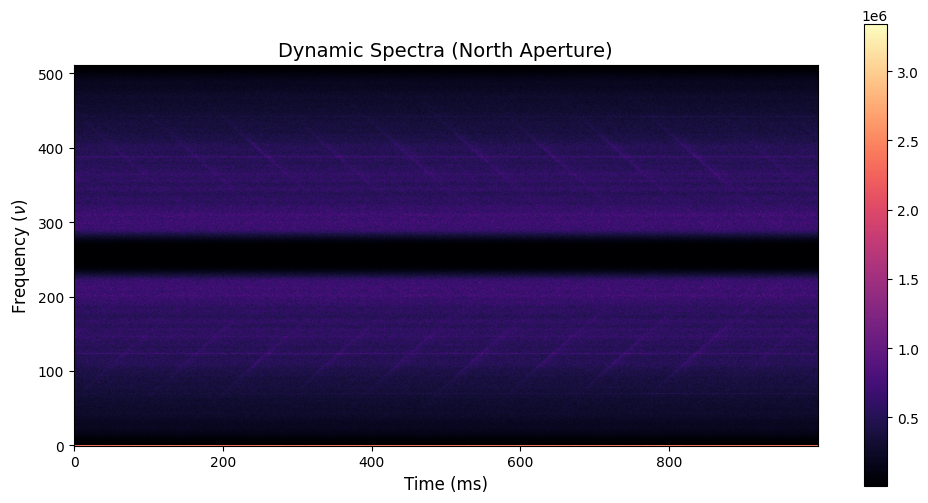

In [13]:
north=north_vol
south=south_vol
points=512

#Selecting little chunks from the data
northChunk=north[0:points]
southChunk=south[0:points]

#Performing FFT's on the chunks
northChunkFFT=fft(northChunk)
southChunkFFT=fft(southChunk)

oneSecondSpectra=list()
i=0; j=0


while i<len(north):
    k=i
    i=i+points
    newNorth=north[k:i]
    newNorthFFT=fft(newNorth)                               #Gives both real as well as complex components
    newNorthFFTSq=newNorthFFT*(np.conj(newNorthFFT))        #Keeps the complex values as 0
    oneSecondSpectra.append(newNorthFFTSq.real)             #length=60000, shape=(60,000, 512)

i=0

#Now we stack spectra corresponding to one millisecond and take average of all one millisecond spectra
#We get a total of 1000 spectra each corresponding to 1 ms making it a total of 1 second of data
milliSecondSpectra=list()
while i<len(oneSecondSpectra):     
    k=i
    i=i+60
    oneMS=np.stack(oneSecondSpectra[k:i])       #length of oneMS=60, shape=(60,512)
    avgOneMS=np.average(oneMS, axis=0)          #length of avgOneMS=512, shape=(512,)       
    milliSecondSpectra.append(avgOneMS)         #length of milliSecondSpectra=1000, shape=(1000,512)


dynamicSpectrum=np.matrix(milliSecondSpectra).transpose()     #length of dynamicSpectrum=512, shape(512, 1000)

#Plotting
plt.figure(figsize=(12,6))

plt.imshow(dynamicSpectrum, origin="lower", cmap="magma")
plt.title("Dynamic Spectra (North Aperture)",fontsize=14)
plt.xlabel("Time (ms)",fontsize=12)
plt.ylabel("Frequency ($\\nu$)",fontsize=12)
plt.colorbar()    

# TASK 6 CROSS POWER SPECTRUM

In Task 6, we aimed to identify the pulsar signal in the dynamic spectrum, estimate the pulsar's rough period, and calculate the dispersion measure (DM). 

1. **Cross Power Spectra**:
   - we started by computing the cross-power spectra between the North and South voltage signals.
   - The cross-power spectra were calculated in small data chunks, with each chunk containing 512 data points.
   - These spectra represent the intensity correlation between the two antennas over time and frequency.

2. **Averaging Cross Power Spectra**:
   - To improve signal-to-noise ratio, we averaged the cross-power spectra for each 64 consecutive chunks. This step helped reduce the impact of noise and interference.

3. **Dynamic Cross Power Spectra**:
   - The resulting data matrix, `corrDynamicSpectra`, represented the dynamic behavior of the cross-power spectra.
   - The X-axis in the plot represented time in milliseconds, while the Y-axis represented frequency. The intensity of each point indicated the correlation strength.

4. **De-dispersion**:
   - Pulsar signals are often dispersed as they travel through the interstellar medium, causing a frequency-dependent delay.
   - we implemented de-dispersion to align the dispersed pulses in the dynamic spectrum.
   - The DM (Dispersion Measure) value, set to 70, was used to estimate the amount of dispersion.
   - The `shift` function was applied to each frequency channel to correct for the dispersion delay. The formula for signal delay was used to calculate the shift.
   - The result was a de-dispersed spectrum with better alignment of pulsar pulses.

5. **De-Dispersed Spectrum Visualization**:
   - we visualized the de-dispersed spectrum as a heatmap, similar to the dynamic spectrum plot.
   - This plot displayed the aligned pulsar pulses, making them more distinct from the noise and interference.
   - The X-axis represented time, and the Y-axis represented frequency.

Interpretation:
- The dynamic spectrum showed patterns of intensity variations in time and frequency, with possible pulsar signals appearing as dispersed streaks.
- The dispersion pattern in the dynamic spectrum indicated that the pulsar signal had a frequency-dependent delay, which needed to be corrected.
- De-dispersion effectively aligned the pulsar pulses, making them more recognizable against the background noise and interference.
- By measuring the separation between the streaks along a single frequency bin in the de-dispersed spectrum, we could estimate the rough period of the pulsar.

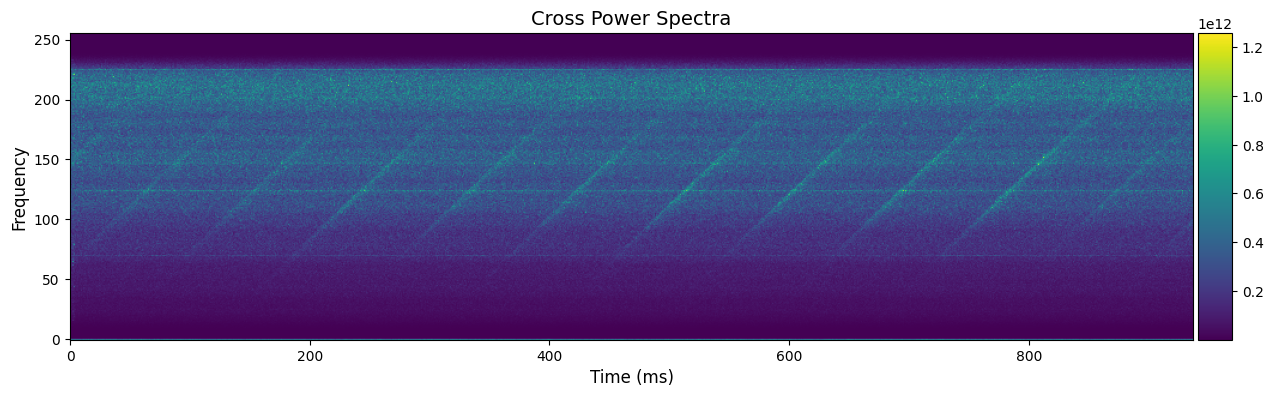

In [30]:
crossSpectra=list()
i=0; j=0

while i<len(north):
    k=i
    i=i+512
    northNew=north[k:i]
    southNew=south[k:i]
    northNewFFT=np.array(fft(northNew))
    southNewFFT=np.array(np.fft.fft(southNew))
    corrFFT=(northNewFFT*np.conj(southNewFFT))
    corrFFTSq=corrFFT*np.conj(corrFFT)
    corrFFTSqReal=corrFFTSq.real
    crossSpectra.append(corrFFTSqReal[0:256])                       

i=0
corrSpectra=list()
while i<len(crossSpectra):
    k=i
    i=i+64
    corrStacked=np.stack(crossSpectra[k:i])                         #length=64, shape=(64, 256)
    avgCorr=np.average(corrStacked, axis=0)                         #length=256, shape=(256,)
    corrSpectra.append(avgCorr)                                     #length=938, shape=(938, 256)


corrDynamicSpectra=np.matrix(corrSpectra).transpose()               #length=256, shape=(256, 938)


plt.figure(figsize=(15,12))
ax=plt.gca()
im=ax.imshow(corrDynamicSpectra, origin="lower")
plt.title('Cross Power Spectra',fontsize=14)
plt.xlabel('Time (ms)',fontsize=12)
plt.ylabel('Frequency',fontsize=12)
divider=make_axes_locatable(ax)
cax=divider.append_axes("right", size="3%", pad=0.05)
plt.colorbar(im, cax=cax)

## De-Dispersion of the Signal


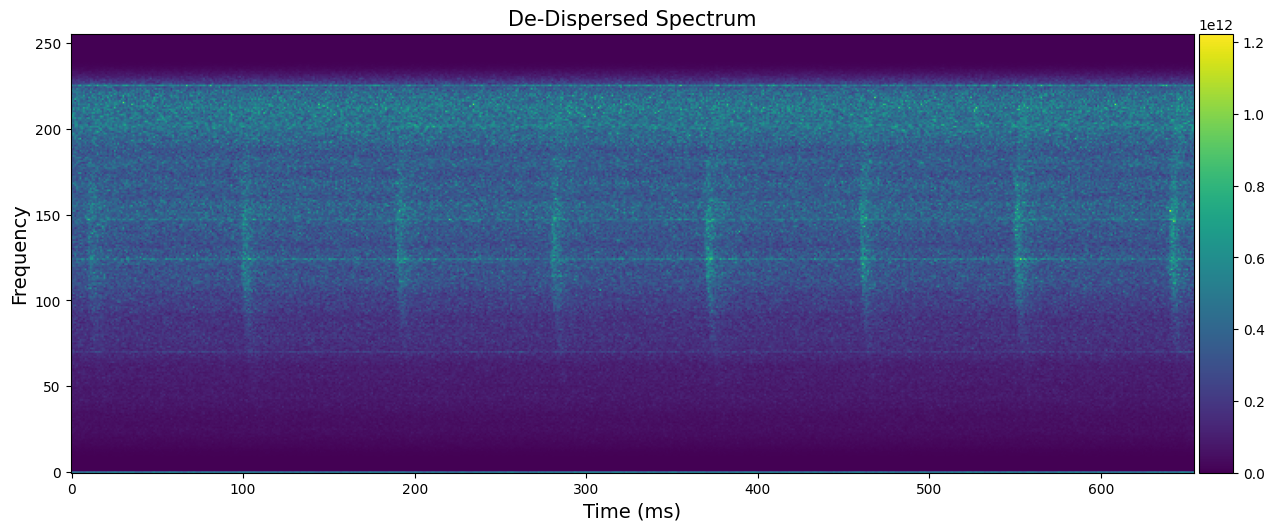

In [31]:
deDispersed=np.zeros(np.shape(corrDynamicSpectra))
frequencyChannel=256
bandwidth=16.5                  #in MHz
centralFrequency=326.5          #in MHz
DM=70                           #Dispersion Measure
freq=np.linspace(centralFrequency-bandwidth/2,
                 centralFrequency+bandwidth/2,frequencyChannel-1)   #generating frequency series

crossSpectra=np.transpose(corrSpectra)  

#shift function shifts the power received according to the delay through time axis
for i in range(255):
    delay = 4.149*1e6*DM*(((freq[i])**-2)-((centralFrequency)**-2))   #Signal delay formula
    deDispersed[i] = shift(crossSpectra[i],delay)

#Plotting
plt.figure(figsize=(15,12))
ax=plt.gca()
im=ax.imshow(deDispersed[:,145:800], origin="lower")
plt.title('De-Dispersed Spectrum',fontsize=15)
plt.xlabel('Time (ms)',fontsize=14)
plt.ylabel('Frequency',fontsize=14)
divider=make_axes_locatable(ax)
cax=divider.append_axes("right", size="3%", pad=0.05)
plt.colorbar(im, cax=cax)

### We have,
  $Δt≈4.149\times10^3\times \frac{DM}{pc\;cm^{-3}}\times(\frac{ν}{MHz})^{-2}\;seconds$

  So,
$DM=0.226295\times 10^{-3}×Δt×ν^2\;pc \;cm^{-3}$

$Δt=0.05s\;;\;f_1=327.4MHz\;;\;f_2=324.6MHz\;;\;Period,P=0.089s$

In [3]:
# Calculating Dispersion Measure
f1= 327.4
f2=324.6
dt=0.05
period=0.089

fsqr=1/((1/f2**2)-(1/f1**2))
DM= (0.226295*10**-3)*dt*(fsqr)         # Formula of DM

print("The Dispersion Measure(DM) is:",DM)

The Dispersion Measure(DM) is: 69.99930316678993


# Task 7 De- Dispersion & integerated pulse profile


In Task 7, we performed the following steps to de-disperse the dynamic spectrum, integrate the contribution across frequencies, and fold the time-series to obtain a folded pulse profile:

1. **De-dispersion**:
   - we corrected the dispersive effects on the pulsar signal using the pulsar's dispersion measure (DM).
   - The goal was to straighten the "curved streaks" (pulsar signal) in the dynamic spectrum and align broadband signals emitted simultaneously.
   - we selected a central frequency bin (zero delay) as a reference point for de-dispersion.
   - Using the rough DM estimate from Task 6, we estimated the relative time offset due to dispersion at all other frequency bins.
   - This involved adjusting the time series above and below the central frequency by the relative time offsets to align the signals.

2. **Spectral Averaging**:
   - we collapsed (spectrally averaged) the de-dispersed dynamic spectrum along the frequency axis.
   - The result was a series of pulsar pulses that could be used for single-pulse studies.

3. **Folding**:
   - we folded the de-dispersed dynamic spectrum over the time axis with the approximate pulsar period determined earlier.
   - This folding process produced integrated pulse profiles for various frequency bins.
   - The integrated pulse profile represented the pulsar's emission over different rotational phases.

4. **Visualization**:
   - we plotted the integrated pulse profile obtained from spectral averaging, showing the power as a function of cycles.
   - The profile provided an overview of the pulsar's emission characteristics over its rotational phase.

Interpretation:
- De-dispersion is a crucial step in pulsar signal processing, as it aligns the dispersed pulses to reveal the characteristic pulse shape.
- The integrated pulse profile displayed the power of the pulsar signal as a function of rotational phase, showing variations in emission intensity.
- A stable and characteristic pulse profile of a pulsar is typically obtained by integrating thousands of individual pulses. Profiles obtained with a small number of pulses may exhibit deviations from the characteristic profile but can still provide valuable information about the pulsar's DM and period.

Overall, Task 7 demonstrated the process of de-dispersion, spectral averaging, and folding to obtain integrated pulse profiles for further analysis and characterization of pulsar signals. These profiles are essential for studying pulsar properties and behavior.



Text(0, 0.5, 'Power')

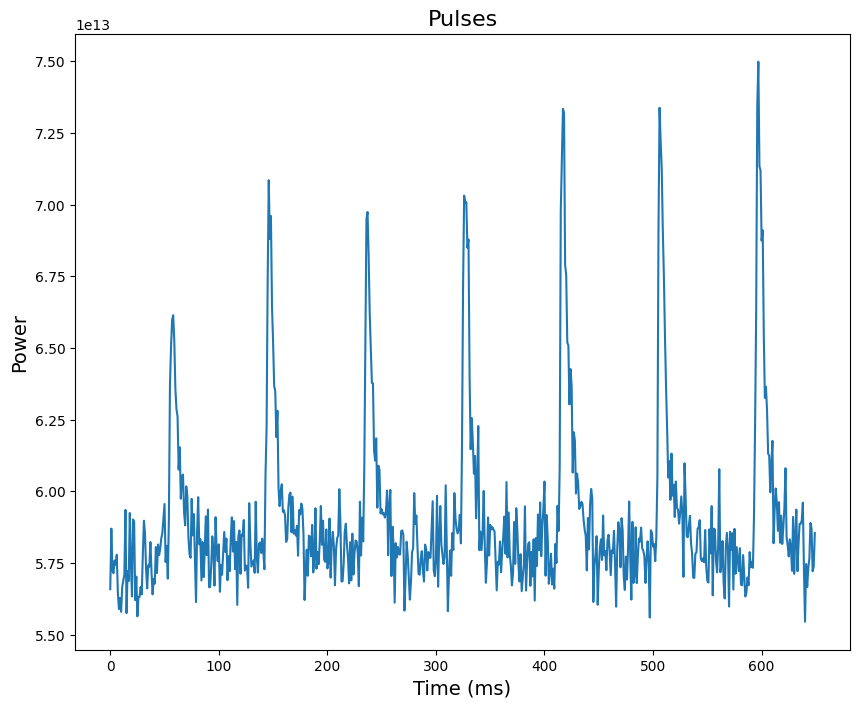

In [32]:
plt.figure(figsize=(10,8))
pulses=deDispersed.sum(0)[100:750]      #Sampling the pulses along the frequency axis
plt.plot(pulses)
plt.title("Pulses", fontsize=16)                        #Plotting the pulses
plt.xlabel("Time (ms)", fontsize=14)
plt.ylabel("Power", fontsize=14)

## Integrated Pulse Profile

Text(0.5, 1.0, 'Integrated Pulse Profile')

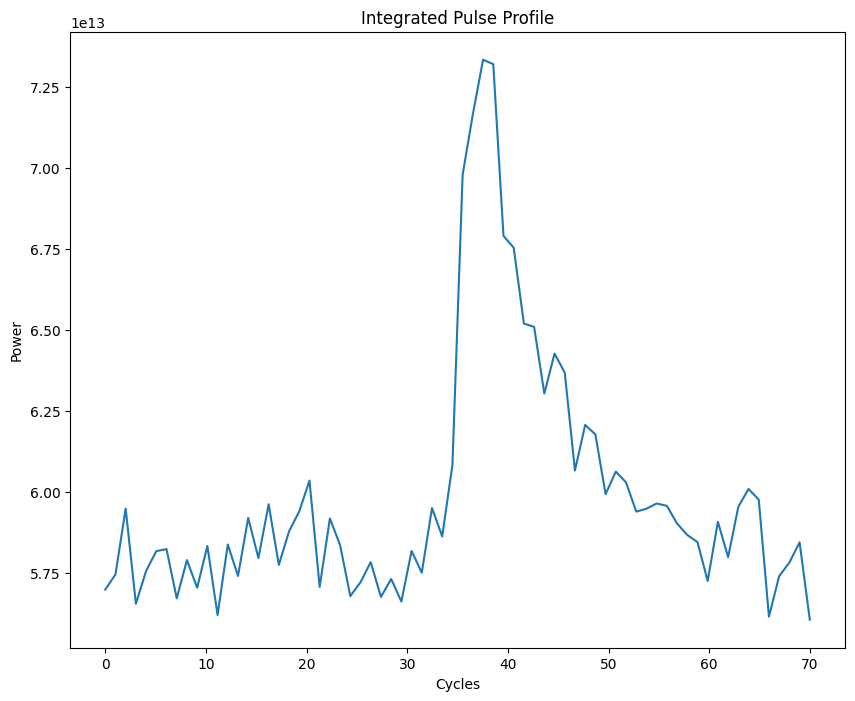

In [34]:
newDispersed=deDispersed[:,80:750]
y=newDispersed.sum(0)
y=y[400:470]
x=np.linspace(0,70,len(y))

plt.figure(figsize=(10,8))
plt.plot(x,y)
plt.xlabel("Cycles")
plt.ylabel("Power")
plt.title("Integrated Pulse Profile")